In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv('customer_churn.csv')
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [8]:
df.drop(["Names", "Onboard_date", "Location", "Company"], axis=1, inplace=True)

In [9]:
df.head()


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


In [10]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8166666666666667


In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       148
           1       0.48      0.41      0.44        32

    accuracy                           0.82       180
   macro avg       0.68      0.66      0.67       180
weighted avg       0.81      0.82      0.81       180



In [13]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=X.column, class_names=["No", "Yes"], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

AttributeError: 'DataFrame' object has no attribute 'column'

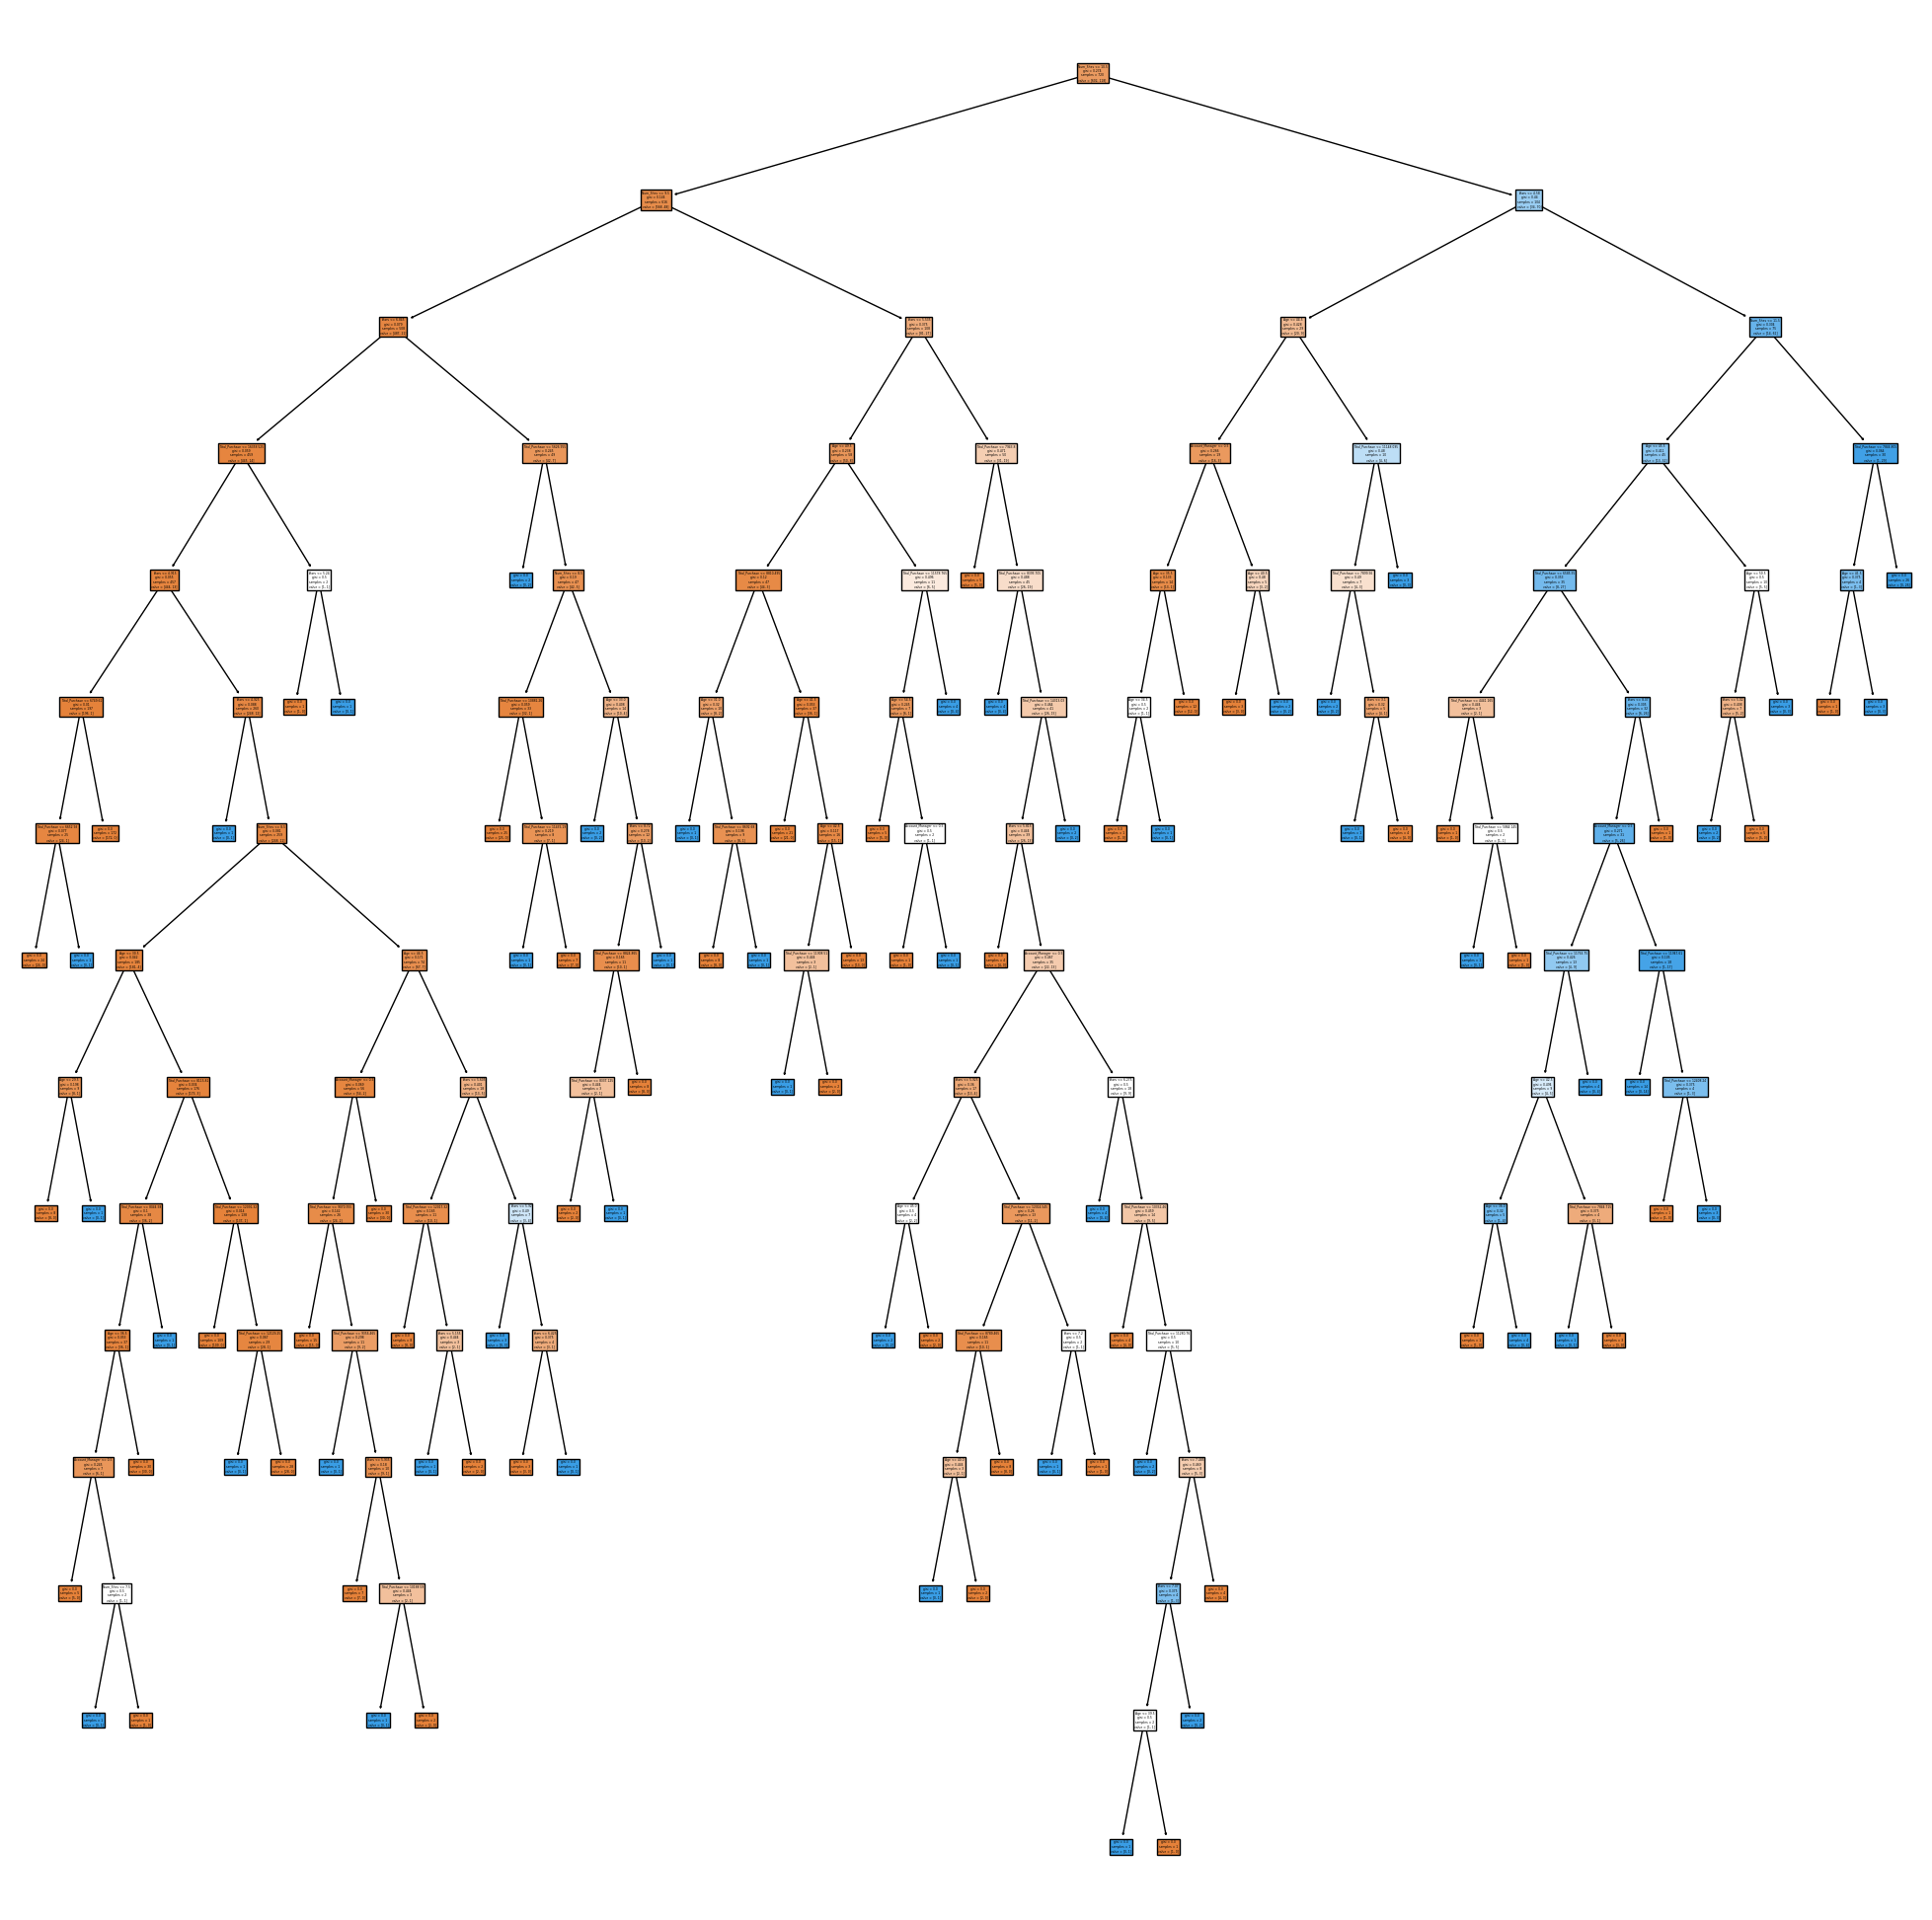

<Figure size 640x480 with 0 Axes>

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,25))
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
t = tree.plot_tree(decision_tree, filled=True, feature_names=X_train.columns)
plt.show()
plt.savefig('decision_tree.png')
plt.savefig('pdf_of_decision_tree.pdf')